In [1]:
#To import all required modules for HW3
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import SpectralEmbedding
from sklearn.svm import SVC
import scipy.io
import numpy as np

%matplotlib inline

In [2]:
#To load and import data from the "faces-ids-n6680-m417-20x20.mat" mat file
#I used scipy library to load the data

dataset = scipy.io.loadmat('dataset/faces-ids-n6680-m417-20x20.mat')

#To get faces and faces id and store them in two different varaibles
faces = dataset['faces']

faces_ids = dataset['ids']
target = dataset['ids']
#convert data to float and scale values between 0 and 1
faces = faces.astype('float')

#scale data
faces /=255.0

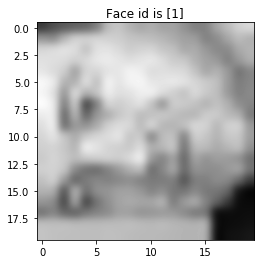

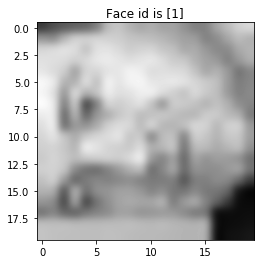

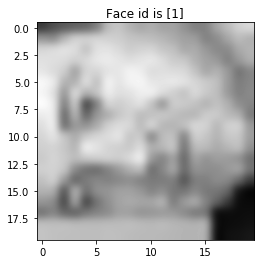

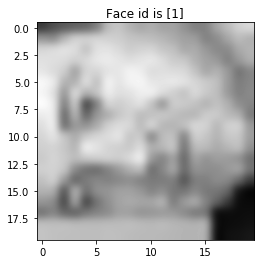

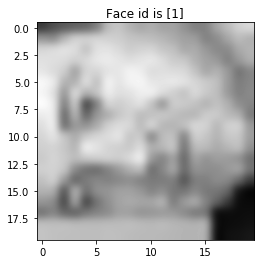

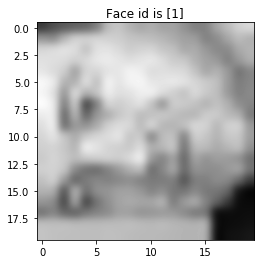

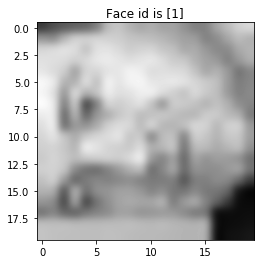

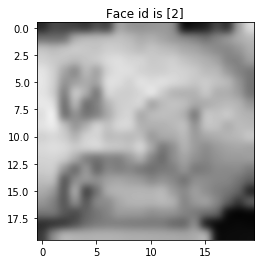

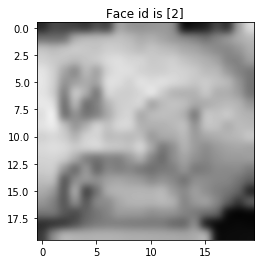

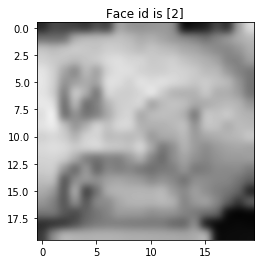

In [3]:
#To show first 10 faces in the data set and it is label

for ids in faces_ids[:10]:
    
    plt.imshow(faces[ids].reshape((20, 20)), cmap=plt.cm.gray, interpolation="gaussian")
    plt.title("Face id is " + str(ids), size=12)
    plt.show()

In [4]:
# To split data set into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(faces, faces_ids, test_size=0.10, random_state=42)


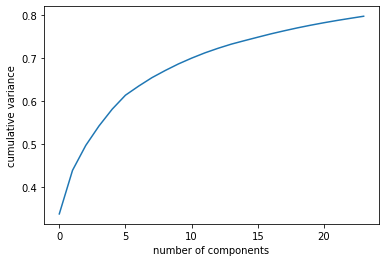

In [14]:
# Compute a PCA (eigenfaces) on the face dataset
n_components = 24
h = 20
w = 20

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

eigenfaces = pca.components_.reshape((n_components, h, w))

# To Project the input data on the eigenfaces
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#To compute Graph Laplacian embedding model after Eigenface projection (A0):
graph_Laplacian_embedding_model = SpectralEmbedding(n_components=n_components, affinity='rbf', gamma=None, random_state=None, eigen_solver=None, n_neighbors=None, n_jobs=None).fit(X_train_pca)
X_train_glem = graph_Laplacian_embedding_model.fit_transform(X_train_pca)
X_test_glem = graph_Laplacian_embedding_model.fit_transform(X_test_pca)



#To plot cumulative variance corrsponding to the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()


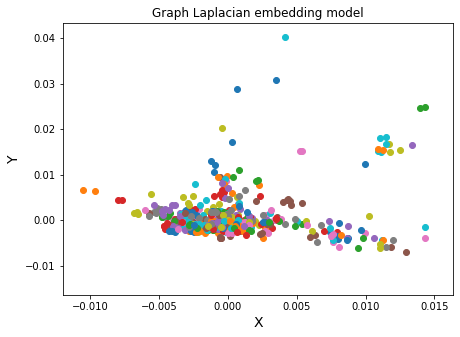

In [15]:
#To plot eigenface model 
first_xglem = X_test_glem[:500, :1]
second_yglem = X_test_glem[:500, 1:2]
faces_labels=y_test[:500]
alpha={0:.3, 1:.5}
fig,ax=plt.subplots(figsize=(7,5))
fig.patch.set_facecolor('white')
for label in np.unique(faces_labels):
 label_id=np.where(faces_labels==label)
 ax.scatter(first_xglem[label_id],second_yglem[label_id])
plt.xlabel("X",fontsize=14)
plt.ylabel("Y",fontsize=14)
plt.title("Graph Laplacian embedding model")
plt.show()


In [19]:
# To Train a SVM classification model

#To create the model
#param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
             # 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
#model = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
#model = SVC(C=1000.0, kernel='rbf', degree=3, gamma=0.0005, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight='balanced', verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)

#To train the model on the X_train_pca
model = graph_Laplacian_embedding_model.fit(X_train_glem, y_train)


#print("Best estimator for the model is:")
#print(model.best_estimator_)

In [20]:
#To predict faces id on the test dataset
print("Predicting Face's id on the test set")

y_pred = model.predict(X_test_glem)


#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred, labels=range(417)))

Predicting Face's id on the test set


AttributeError: 'SpectralEmbedding' object has no attribute 'predict'

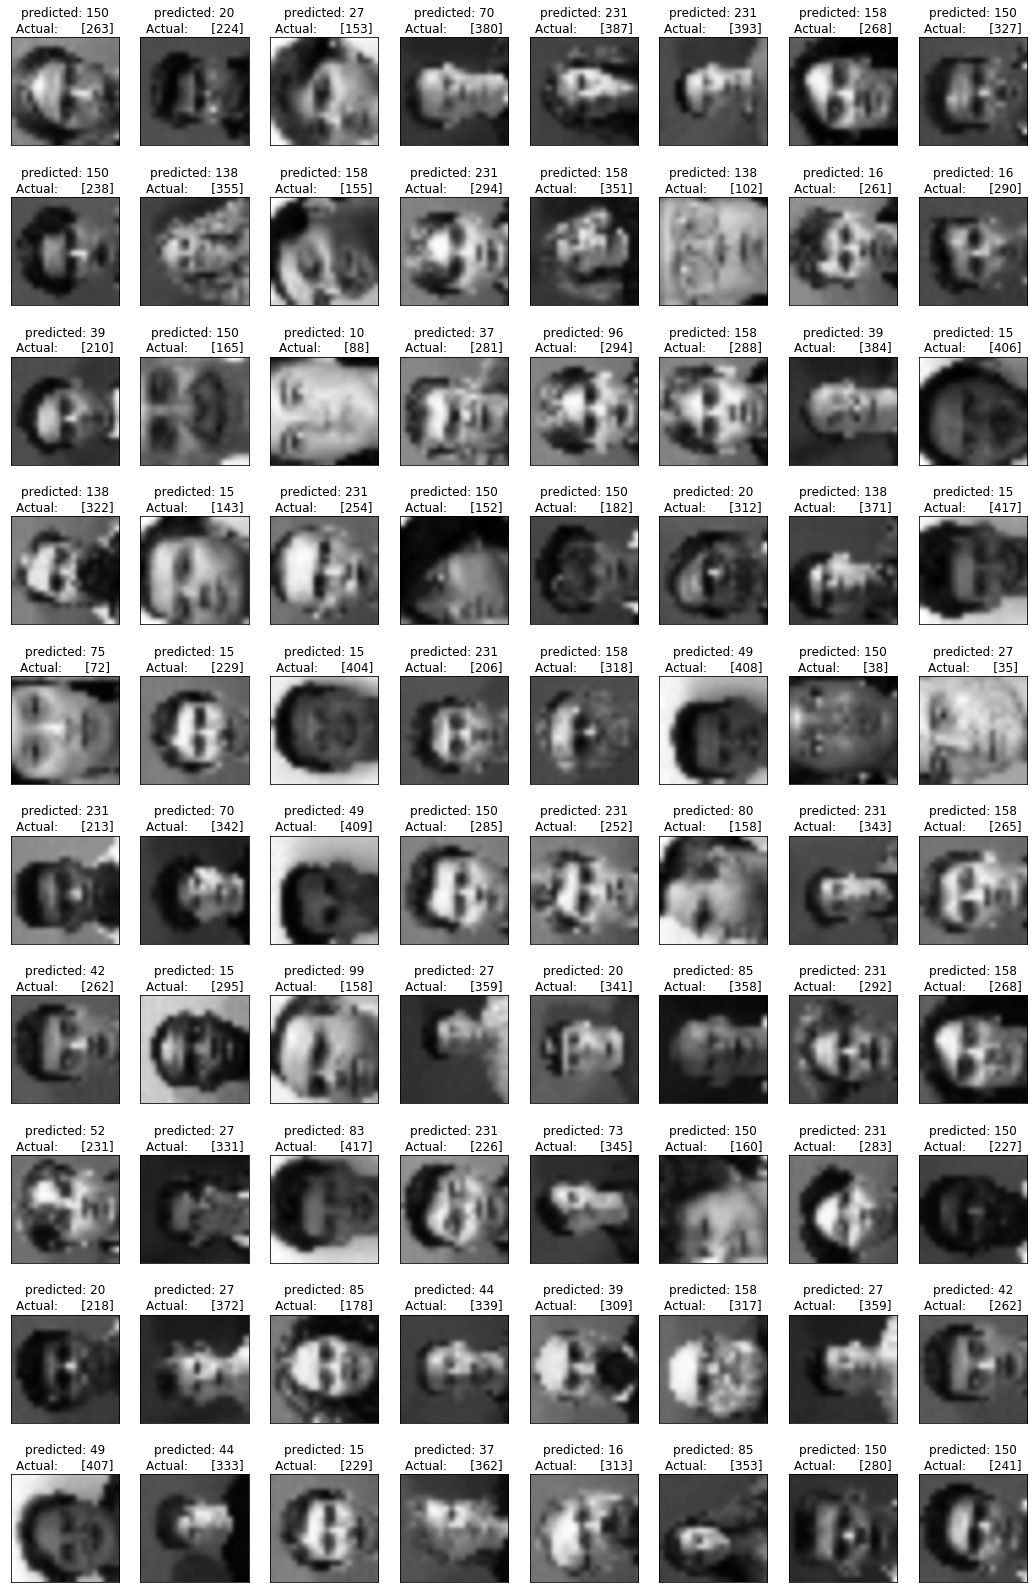

In [18]:
#To plot eigenfaces and test faces result 
def plot_faces(imgs, titles, h, w, n_row=10, n_col=8):
    
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(imgs[i].reshape((h, w)), cmap=plt.cm.gray, interpolation="gaussian")
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#To generate predicted an actual id for face in the plot
def provide_title(y_pred, y_test, i):
    pred_id = y_pred[i]
    true_id = y_test[i]
    return 'predicted: %s\nActual:      %s' % (pred_id, true_id)


prediction_titles = [provide_title(y_pred, y_test, i)
                     for i in range(y_pred.shape[0])]

#To plot faces from test dataset
plot_faces(X_test, prediction_titles, h, w)

#To plot the eigenfaces

#get_eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
#plot_faces(eigenfaces, get_eigenface_titles, h, w)

plt.show()